# Modelo de Regresión Logistica

## Importar Librerías

Para hacer una regresión logistica en python, vamos a usar scikit-learn, que es una librería de python para aprendizaje automático.

El primer paso que daremos será el de importar las librerías que vamos utilizar, en especial las necesarias para importar los datos que utilizaremos.

En este caso vamos a importar de sklearn el datasets, que es donde se guardan todos los conjuntos de datos que dispone esta librería.

In [2]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Carga de Datos

Ahora procedemos a importar los datos, para ello utilizamos la instrucción datasets punto load breast cancer y almacenamos esta información dentro de la variable dataset.

In [3]:
bc_dataset = datasets.load_breast_cancer()

In [4]:
print(bc_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Procesamiento de Datos

In [5]:
# Seleccionamos todas las columnas
x = bc_dataset.data
# Definimos los datos correspondientes a las etiquetas
y = bc_dataset.target

print(x.shape, y.shape)

(569, 30) (569,)


In [6]:
x = x[:,0:2]
print(x.shape)

(569, 2)


Recuerda que y cuenta con una sola columna con solamente ceros y unos, los unos indican que el tumor es maligno mientras que los ceros corresponden al tumor benigno.
Definido x y y, ya podemos realizar la separación correspondiente a los datos de prueba y entrenamiento. 

Para ello importamos la respectiva librería y procedemos a utilizar train_test_split para separar los datos.

Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [7]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(455, 2) (114, 2)
(455,) (114,)


El siguiente paso que realizaremos es escalar los datos, esto se hace ya que las características son completamente distintas en magnitudes, unidades y rango por lo que lo mejor es escalarlos para llevarlos a un mismo nivel de magnitudes.

Para realizar este procedimiento importaremos el método StandarScaler de la librería scikit-learn.

In [8]:
escalar = StandardScaler()
X_train = escalar.fit_transform(x_train)  ## Encontrar la media y varianza
X_test = escalar.transform(x_test)

## Entrenamiento del Modelo

Creamos y entrenamos el modelo:

In [9]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Realizamos una predicción:

In [10]:
print(X_test.shape)
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(114, 2)
(114,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


## Evaluando el Modelo:

Verifico la matriz de confusión:

In [22]:
print(y_test.shape, y_pred.shape)

matriz = confusion_matrix(y_test, y_pred)
print(f'\nMatriz de Confusión:\n{matriz}')

(114,) (114,)

Matriz de Confusión:
[[ 0 44]
 [ 0 70]]


In [19]:
precision = precision_score(y_test, y_pred)
print(f'Precisión del modelo: {precision}')

Precisión del modelo: 0.6140350877192983


In [23]:
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud}')

Exactitud del modelo: 0.6140350877192983


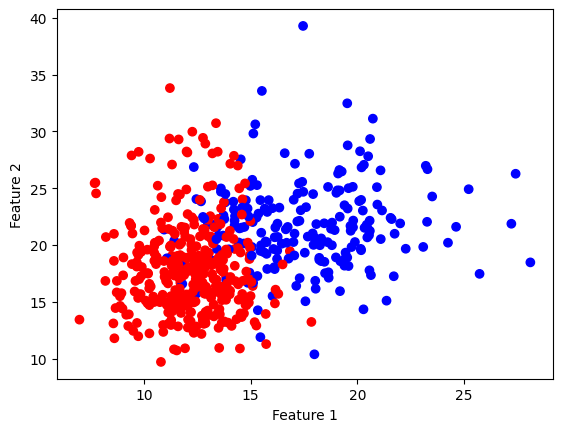

In [24]:
atributo_A = 0
atributo_B = 1

import matplotlib.pyplot as plt
# Visualizar los resultados en un gráfico de dispersión
plt.scatter(x[:, atributo_A], x[:, atributo_B], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Crear una malla para visualizar la frontera de decisión
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1


[[ 5.981       8.71      ]
 [ 6.21462626  8.71      ]
 [ 6.44825253  8.71      ]
 ...
 [28.64274747 40.28      ]
 [28.87637374 40.28      ]
 [29.11       40.28      ]]
10000


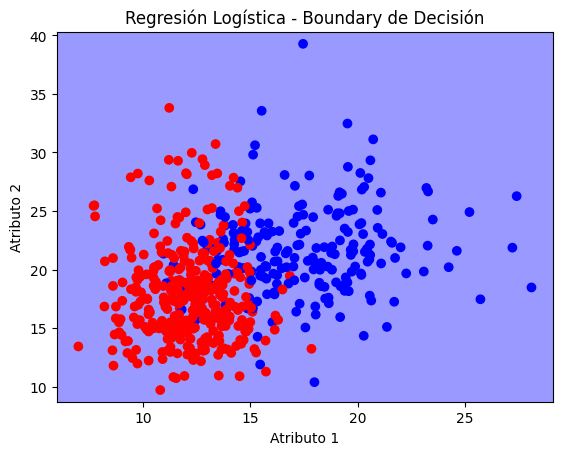

In [25]:
# Generar una malla de puntos para representar la frontera de decisión
x_min, x_max = x[:, atributo_A].min() - 1, x[:, atributo_A].max() + 1
y_min, y_max = x[:, atributo_B].min() - 1, x[:, atributo_B].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

print(np.c_[xx.ravel(), yy.ravel()])

# Obtener las predicciones para cada punto en la malla
Z = model.predict(escalar.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
print(np.count_nonzero(Z == 1))

# Graficar el contorno de la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')

# Graficar los puntos de datos
plt.scatter(x[:, atributo_A], x[:, atributo_B], c=y, cmap='bwr')

# Etiquetas y título del gráfico
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.title('Regresión Logística - Boundary de Decisión')

# Mostrar el gráfico
plt.show()